In [272]:
from sympy import *
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.optimize import minimize
import time
init_printing()

In [273]:
nB1,rB1 = np.loadtxt("Blue_1sigma.csv", delimiter=',',unpack=True)
nB2,rB2 = np.loadtxt("Blue2_sigma.csv", delimiter=',',unpack=True)
nG1,rG1 = np.loadtxt("Grey_1sigma.csv", delimiter=',',unpack=True)
nG2,rG2 = np.loadtxt("Grey_2sigma.csv", delimiter=',',unpack=True)

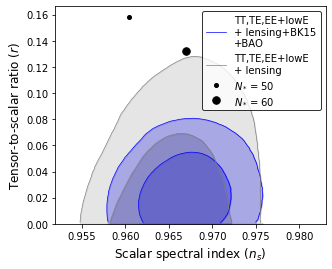

In [303]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(nB1,rB1,'b',label='TT,TE,EE+lowE\n+ lensing+BK15\n+BAO',linewidth=0.7)
ax.plot(nB2,rB2,'b',linewidth=0.7)
ax.plot(nG1,rG1,color='#808080',label='TT,TE,EE+lowE\n+ lensing',linewidth=0.7)
plt.plot(nG2,rG2,color='#808080',linewidth=0.7)
plt.fill_between(nB1, 0,rB1,color='blue',alpha=0.4)
plt.fill_between(nG1, 0, rG1,color='grey',alpha=0.4)
plt.fill_between(nB2, 0, rB2,color='blue',alpha=0.3)
plt.fill_between(nG2, 0, rG2,color='grey',alpha=0.2)
plt.plot(x1, y1,'k.',markersize=8, label='$N_*=50$')
plt.plot(x2, y2,'k.',markersize=15,label='$N_*=60$')
plt.axis(ymin=0,xmin=0.952,xmax=0.983)
plt.xlabel("Scalar spectral index ($n_s$)",fontsize = 12)
plt.ylabel("Tensor-to-scalar ratio ($r$)",fontsize = 12)
leg=plt.legend(loc='upper right')
#loc='center left', bbox_to_anchor=(1, 0.5)
leg.get_frame().set_edgecolor('k')
plt.savefig('figura.pdf',format='pdf')
#,bbox_extra_artists=(leg,), bbox_inches='tight'
ax.set_aspect(0.15)
plt.show()



In [275]:
x1=-4/(1+2*50)+1
y1=-4*(x1-1)
x1,y1

In [276]:
x2=-4/(1+2*60)+1
y2=-4*(x2-1)
x2,y2

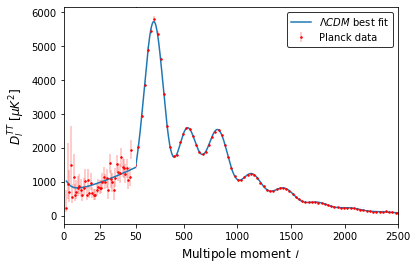

In [269]:
L,TT,TE,EE,BB,PP=np.loadtxt("COM_PowerSpect_CMB-base-plikHM-TTTEEE-lowl-lowE-lensing-minimum-theory_R3.01.txt",unpack=True)
l,dl,dlmin,dlmax,bestfit=np.loadtxt("COM_PowerSpect_CMB-TT-binned_R3.01.txt",unpack=True)
l_,dl_,dlmin_,dlmax_=np.loadtxt("COM_PowerSpect_CMB-TT-full_R3.01.txt",unpack=True)
l_=l_[:46]
dl_=dl_[:46]
dlmin_=dlmin_[:46]
dlmax_=dlmax_[:46]

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

# Numbers from -50 to 50, with 0.1 as step
xdomain = TT

axMain = plt.subplot(111)
axMain.plot(L, xdomain,label='$\Lambda CDM$ best fit')
axMain.errorbar(l,dl,yerr=np.array([dlmin,dlmax]),fmt='ro',markersize=1.5,elinewidth=0.4,label='Planck data')
axMain.set_xscale('linear')
axMain.set_xlim((50, 2500))
axMain.spines['left'].set_visible(False)
axMain.yaxis.set_ticks_position('right')
axMain.yaxis.set_visible(False)
plt.xlabel("Multipole moment $\mathcal{l}$",fontsize = 12)
axMain.xaxis.set_label_coords(0.4, -0.1)

leg=plt.legend()
leg.get_frame().set_edgecolor('k')
divider = make_axes_locatable(axMain)
axLin = divider.append_axes("left", size=1, pad=0, sharey=axMain)
axLin.set_xscale('linear')
axLin.set_xlim((0,50))
axLin.plot(L, xdomain)
axLin.errorbar(l_,dl_,yerr=np.array([dlmin_,dlmax_]),fmt='ro',markersize=1.5,elinewidth=0.4)
axLin.spines['right'].set_visible(False)
axLin.yaxis.set_ticks_position('left')
plt.setp(axLin.get_xticklabels(), visible=True)

plt.ylabel("$D_l^{TT} \ [\mu K^2 ]$ ",fontsize = 12)
plt.savefig('CMBfull.pdf',format='pdf')

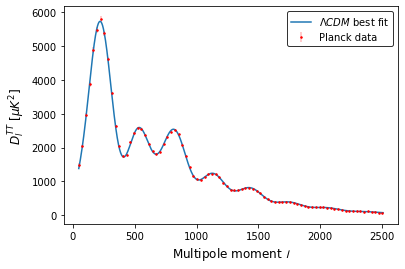

In [270]:
L=L[46:]
TT=TT[46:]

plt.plot(L,TT,label='$\Lambda CDM$ best fit')
plt.errorbar(l,dl,yerr=np.array([dlmin,dlmax]),fmt='ro',markersize=1.5,elinewidth=0.4,label='Planck data')
#plt.errorbar(l_,dl_,yerr=np.array([dlmin_,dlmax_]),fmt='ro',label='Data',markersize=1.5,elinewidth=1)
plt.xlabel("Multipole moment $\mathcal{l}$",fontsize = 12)
plt.ylabel("$D_l^{TT} \ [\mu K^2 ]$ ",fontsize = 12)
plt.autoscale(enable=True, axis='x')
leg=plt.legend()
leg.get_frame().set_edgecolor('k')
plt.savefig('CMB.pdf',format='pdf')

